# **Sample Quality Check - Durham Police Department Arrest Reports**
### Introduction
<font color=#FF0000>*TBD*</font><br><br>
This document contains sample code and instructions on how to evaluate the conditions of data once it is in a table format based on factors such as accuracy, completeness, consistency, reliability and whether it's up to date.
- **Quality metrics**: 
    - Completenes % (Counts & proportions of NAs)
        - Which NAs are relevant? Which should we try to impute or delete entirely?
    - Consistency (Value Counts, search for typos)
        - How to fix inconsistent categorical values?
    - Reliability (Perceived vs. Self reported, which values should be consistent?)
    - Currency (Dates, how old is too old?)
- **Summary statistics**:
    - Mean, min, max for continuous variables, crosstabs for discrete
    - Cross-comparison counts for discrete categorical variables 
- **Distributions**:
    - Histograms for continuous variables
    - Crosstabs, barplots for discrete categoricals variables

### **Step #1:** Load the data

In [ ]:
%pip install ipywidgets

FileUpload(value=(), description='Upload')

In [10]:
#Load that data in table format:
# https://www.practicaldatascience.org/html/pandas_series.html offers a quick tutorial on how to use the Pandas library if you are not familiar.
# The most common table data format is csv (comma separated values).
# Other common functions you may use to load the data are: pd.read_excel, pd.read_stata.


import ipywidgets as widgets
import io
import os
import pandas as pd

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)


#uploader = widgets.FileUpload()
#display(uploader)

ls_string= os.listdir('data/')
print(ls_string)

fileSelect = widgets.Dropdown(
    options= os.listdir('data/'),
    disabled=False
)
print("Select your datafile")
display(fileSelect)

['arrests_charges.csv']
Select your datafile


Dropdown(options=('arrests_charges.csv',), value='arrests_charges.csv')

In [12]:
#uploaded_file = uploader.value[0]
#pd.read_csv(io.BytesIO(uploaded_file.content),index_col=[0])
pd.read_csv(os.path.join("data/",fileSelect.value),index_col=[0])

FileNotFoundError: [Errno 2] No such file or directory: 'arrests_charges.csv'

In [ ]:

# Take a first look:
pd.set_option("display.max_rows", None)
numRows = widgets.Dropdown(
    options=['5', '10', '15', '20'],
    value='5',
    description='Number:',
    disabled=False,
)
print("Select the number of rows you would like to preview")
display(numRows)

Select the number of rows you would like to preview


Dropdown(description='Number:', options=('5', '10', '15', '20'), value='5')

In [ ]:
arrests.sample(int(numRows.value))

agencyname   datetimeofarrest  \
1085   Durham Police Department  05/25/2022  07:24   
10724  Durham Police Department  01/21/2019  02:59   
18621  Durham Police Department  03/01/2022  20:52   
14880  Durham Police Department  04/07/2022  10:28   
3204   Durham Police Department  09/17/2021  12:32   
15039  Durham Police Department  04/07/2022  10:28   
3083   Durham Police Department  02/19/2021  21:57   
27312  Durham Police Department  12/05/2018  21:42   
6614   Durham Police Department  10/14/2020  15:49   
5851   Durham Police Department  09/09/2020  16:06   
11193  Durham Police Department  11/25/2019  16:43   
7203   Durham Police Department  03/28/2022  09:13   
20264  Durham Police Department  05/01/2021  22:29   
19039  Durham Police Department  01/19/2019  10:44   
2910   Durham Police Department  11/27/2021  09:07   

                                         file  arrestnumber  \
1085      00 Raw Data/data/arrests0003110.pdf        330704   
10724     00 Raw Data/data/arrests0006762.pdf        308889   
18621     00 Raw Data/data/arrests0001990.pdf        329460   
14880     00 Raw Data/data/arrests0002781.pdf        329992   
3204      00 Raw Data/data/arrests0001865.pdf        326155   
15039     00 Raw Data/data/arrests0002781.pdf        329992   
3083      00 Raw Data/data/arrests0005269.pdf        322147   
27312     00 Raw Data/data/arrests0007240.pdf        308068   
6614   00 Raw Data/missing/arrests0001467.pdf        320379   
5851   00 Raw Data/missing/arrests0001468.pdf        319872   
11193     00 Raw Data/data/arrests0011406.pdf        315385   
7203      00 Raw Data/data/arrests0003095.pdf        329858   
20264     00 Raw Data/data/arrests0006183.pdf        324170   
19039     00 Raw Data/data/arrests0006802.pdf        308869   
2910      00 Raw Data/data/arrests0000689.pdf        327202   

              scars_tattoes_bodymarkings_etc  age race sex citizenship  \
1085           TATT UPPR ARM;  TATT UPPL ARM   39    B   M          US   
10724  SCAR LEFT FOREARM;  SCAR LEFT ABDOMEN   35    B   M          US   
18621                                    NaN   54    W   M          EL   
14880                                    NaN   56    B   F          US   
3204           TATT UPPR ARM;  TATT UPPL ARM   60    W   M          US   
15039                                    NaN   56    B   F          US   
3083                                     NaN   56    B   M          US   
27312                                    NaN   29    B   F          US   
6614                                     NaN   22    B   M          US   
5851                          SCAR LEFT HAND   54    B   M          US   
11193                                    NaN   22    B   M          US   
7203                                     NaN   36    W   M          US   
20264                                    NaN   35    W   M          HD   
19039              TATT UPP  CHEST / GISELLE   22    B   F          US   
2910                           TATT RIGH SHO   39    B   M          US   

      skintone height  weight haircolor eyecolor    armed        typeofarrest  \
1085    Medium   5'09   170.0     Black    Brown  UNARMED             ON VIEW   
10724     Dark   5'10   200.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   
18621      NaN   5'04     NaN     Black    Brown  UNARMED             ON VIEW   
14880   Medium   5'05   153.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   
3204     Light   5'09   160.0     Brown    Brown  UNARMED             ON VIEW   
15039   Medium   5'05   153.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   
3083      Dark   5'06   185.0     Black    Brown  UNARMED      SUMMONED/CITED   
27312    Light   5'03    98.0     Brown    Brown  UNARMED             ON VIEW   
6614      Dark   6'03   120.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   
5851      Dark   6'03   180.0     Black    Brown  UNARMED      SUMMONED/CITED   
11193   Medium   5'07   130.0     Black    Brown  UNARMED  TAKEN INTO C

### **Step #2:** Which type of data do we have?
Typically, police records inform of interactions between the police and a civilian. The first step in measuring the quality of your dataset is finding out which type of data you have. 
As you understand the types of fields you have, define the unit of observation. Think of what does one row in your table represent.<br>
In this example, one row is one police charge. However, there is a hiwerarchy. All charge to the same person on one police interaction are under the same "case" which is identifiable by an "arrest number". Keep in mind this hierarchy is important to understand how police interacts with individual people. 

In [ ]:
# Check the names of the columns and verify agains the provided Metadata document which information is relevant to analysis you may wish to perform
arrests.columns


Index(['agencyname', 'datetimeofarrest', 'file', 'arrestnumber',
       'scars_tattoes_bodymarkings_etc', 'age', 'race', 'sex', 'citizenship',
       'skintone', 'height', 'weight', 'haircolor', 'eyecolor', 'armed',
       'typeofarrest', 'placeofarrest', 'page_num', 'charges', 'charge_type',
       'charge_counts', 'charge_IBRcode', 'charge_statutenumber',
       'charge_warrantdate', 'chargenum'],
      dtype='object')

In [ ]:
# Look for unique identifiers to find the level of granularity of your data:
# If there are no unique columns are
arrests[
    "arrestnumber"
].is_unique  # for example: arrest number is not unique for each offense, but it is unique for a case


False

### **Step #3:** Measure data quality (completeness, currency, reliability & consistency)
The completeness of fields in your dataset will determine if you can conduct conclusive analysis. For example, one column *"scars_tattoes_bodymarkings_etc"* has missing values in most rows. In this example, there are 2 posibilities: (1) This information is often forgotten or impossible to collect by the police. (2) A missing value means there absence of visible "scars, tattoes or bodymarkings".<br>
In any case, this column is probably not an important feature to study racial and gender biases, so we can ignore or drop it from the dataset.

In [ ]:
# Measure data completeness and data types:
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
        columns={0: "Zero Values", 1: "Missing Values", 2: "% of Total Values"}
    )
    mz_table["Total Zero Missing Values"] = (
        mz_table["Zero Values"] + mz_table["Missing Values"]
    )
    mz_table["% Total Zero Missing Values"] = (
        100 * mz_table["Total Zero Missing Values"] / len(df)
    )
    mz_table["Data Type"] = df.dtypes
    mz_table = (
        mz_table[mz_table.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(1)
    )
    print(
        "Your selected dataframe has "
        + str(df.shape[1])
        + " columns and "
        + str(df.shape[0])
        + " Rows.\n"
        "There are " + str(mz_table.shape[0]) + " columns that have missing values."
    )
    #         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
    return mz_table


missing_zero_values_table(arrests)


Your selected dataframe has 25 columns and 27526 Rows.
There are 7 columns that have missing values.


Zero Values  Missing Values  \
scars_tattoes_bodymarkings_etc            0           16049   
skintone                                  0            2285   
weight                                    0            2158   
citizenship                               0             914   
eyecolor                                  0             827   
haircolor                                 0             690   
armed                                     0              26   

                                % of Total Values  Total Zero Missing Values  \
scars_tattoes_bodymarkings_etc               58.3                      16049   
skintone                                      8.3                       2285   
weight                                        7.8                       2158   
citizenship                                   3.3                        914   
eyecolor                                      3.0                        827   
haircolor                                     2.5                        690   
armed                                         0.1                         26   

                                % Total Zero Missing Values Data Type  
scars_tattoes_bodymarkings_etc                         58.3    object  
skintone                                                8.3    object  
weight                                                  7.8   float64  
citizenship                                             3.3    object  
eyecolor                                                3.0    object  
haircolor                                               2.5    object  
armed                                                   0.1    object

In [ ]:
# Fix data types:
# For example, change date columns to "datetime" type:
arrests["datetimeofarrest"] = pd.to_datetime(
    arrests["datetimeofarrest"], infer_datetime_format=True
)
arrests["year"] = arrests["datetimeofarrest"].dt.strftime("%Y")
arrests.sample(5)


agencyname    datetimeofarrest  \
24829  Durham Police Department 2022-01-15 01:20:00   
26821  Durham Police Department 2021-12-27 03:08:00   
21739  Durham Police Department 2020-06-10 08:42:00   
17403  Durham Police Department 2020-05-12 11:54:00   
14333  Durham Police Department 2018-11-11 13:20:00   

                                      file  arrestnumber  \
24829  00 Raw Data/data/arrests0000008.pdf        327760   
26821  00 Raw Data/data/arrests0000277.pdf        327548   
21739  00 Raw Data/data/arrests0012266.pdf        318683   
17403  00 Raw Data/data/arrests0011573.pdf        318218   
14333  00 Raw Data/data/arrests0007688.pdf        307647   

      scars_tattoes_bodymarkings_etc  age race sex citizenship skintone  \
24829                            NaN   32    W   F          US    Light   
26821                            NaN   54    B   F         NaN      NaN   
21739                            NaN   55    W   M          XX    Olive   
17403     TATT LEFT HAND / "T MONEY"   25    B   M          US     Dark   
14333                            NaN   38    B   F          US   Medium   

      height  weight haircolor eyecolor    armed        typeofarrest  \
24829   5'06   170.0     Brown    Brown  UNARMED             ON VIEW   
26821   5'03   160.0       NaN      NaN  UNARMED      SUMMONED/CITED   
21739   5'05   140.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   
17403   5'08   150.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   
14333   5'06   140.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   

                           placeofarrest  page_num  \
24829      3105 TOWER BLVD - 207, DURHAM       0.0   
26821           720 S LASALLE ST, DURHAM       0.0   
21739  1399 HOLLOWAY ST/PARK AVE, DURHAM       0.0   
17403            219 S MANGUM ST, DURHAM       0.0   
14333             917 LIBERTY ST, DURHAM       0.0   

                                  charges charge_type  charge_counts  \
24829  Simple Assault & Battery Or Affray        Misd            1.0   
26821              Driving While Impaired        Misd            1.0   
21739        Uttering A Forged Instrument         Fel            1.0   
17403             True Bill Of Indictment         Fel            1.0   
14333    Possession Of Drug Paraphernalia        Misd            1.0   

      charge_IBRcode charge_statutenumber charge_warrantdate  chargenum  year  
24829            13B             14-33(A)         01/15/2022          1  2022  
26821            90D             20-138.1         12/27/2021          2  2021  
21739            250               14-120         08/31/2018          2  2020  
17403            90Z        15A-305(B)(1)         03/17/2020          1  2020  
14333            35B            90-113.22         09/11/2018          1  2018

count                            27526
mean     2020-08-22 22:00:17.993896704
min                2018-10-01 07:47:00
25%                2019-09-13 04:48:30
50%                2020-07-26 13:37:00
75%                2021-08-16 22:52:00
max                2022-05-31 22:36:00
Name: datetimeofarrest, dtype: object


<AxesSubplot:title={'center':'Count of Cases per year'}, xlabel='year'>

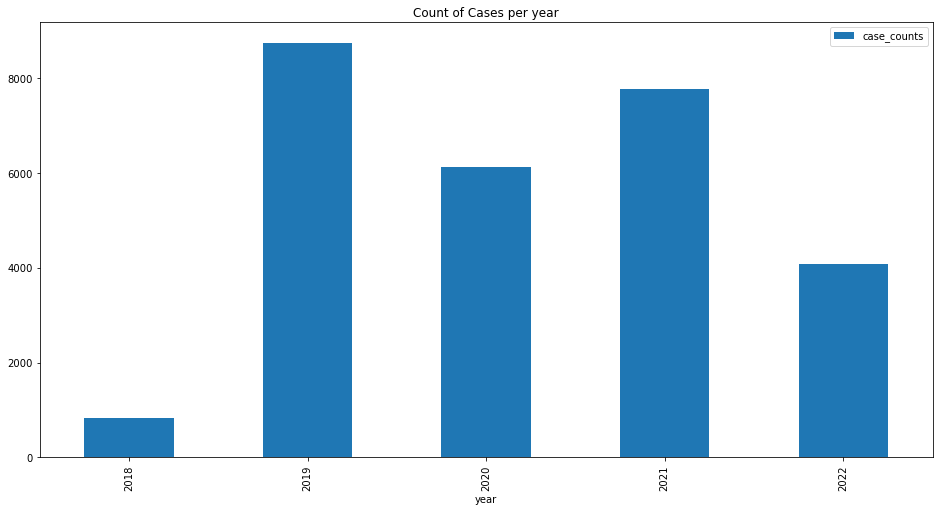

In [ ]:
# Another way to check for missing values is looking at trends
# Lets look at # of cases:
arrests["case_counts"] = 1
cases = arrests[["case_counts", "year"]].groupby(by=["year"]).sum().reset_index()
# cases.year.value_counts().plot(kind= 'bar',figsize=(16,8), title="Count of offenses per year")
print(arrests['datetimeofarrest'].describe(datetime_is_numeric=True))
cases.plot(kind="bar", figsize=(16, 8), title="Count of Cases per year", x="year")


**Note:** *Data collection for this data set started with cases from Octobe 2018, the most recent case is from the last day of May in 2022. With this information we can say there are no unexpected trends in the count of cases per year.*
<br>
Categorical values can be checked for correctness based on how consistent are categories.

In [ ]:
# To check for consistency of categorical values, use ".value_counts()" in each categorical column
# Think of the possible categories of that column and if there are possible typos, change the type
print("\nSkin Tone:")
print(arrests['skintone'].value_counts())
print("\nRace:")
print(arrests['race'].value_counts())
print("\nType of Arrest:")
print(arrests['typeofarrest'].value_counts())
print("\nCharge Type:")
print(arrests['charge_type'].value_counts())


Skin Tone:
Medium     11707
Dark        5937
Light       3508
Fair        2257
Black       1017
Olive        755
Other         32
Unknown       16
Ruddy          9
Albino         2
Yellow         1
Name: skintone, dtype: int64

Race:
B    21381
W     5942
A       99
U       53
I       51
Name: race, dtype: int64

Type of Arrest:
TAKEN INTO CUSTODY    13216
ON VIEW               10964
SUMMONED/CITED         3346
Name: typeofarrest, dtype: int64

Charge Type:
Misd    18715
Fel      8809
I           1
2           1
Name: charge_type, dtype: int64


In [ ]:
# For practical purposes, we can combine skin tones "fair" and "light", we can also get rid of Yellow since there is only one. Ruddy?

In [ ]:
# Lets examine the non-conforming categories in the "charge_type" column:
arrests.loc[arrests['charge_type']=='I']

agencyname    datetimeofarrest  \
6444  Durham Police Department 2022-03-27 13:23:00   

                                     file  arrestnumber  \
6444  00 Raw Data/data/arrests0003131.pdf        329847   

     scars_tattoes_bodymarkings_etc  age race sex citizenship skintone height  \
6444                            NaN   19    B   M          US     Dark   5'05   

      weight haircolor eyecolor    armed        typeofarrest  \
6444   135.0     Black    Brown  UNARMED  TAKEN INTO CUSTODY   

                  placeofarrest  page_num  \
6444  3643 N ROXBORO ST, DURHAM       0.0   

                                             charges charge_type  \
6444  Speeding - Failure To Reduce To Avoid Accident           I   

      charge_counts charge_IBRcode charge_statutenumber charge_warrantdate  \
6444            1.0           9914            20-141(M)         03/27/2022   

      chargenum  year  case_counts  
6444          3  2022            1

In [ ]:
# One option is to look at which type of charge is often given to the charge in question
print(arrests.loc[arrests['charges']=='Speeding - Failure To Reduce To Avoid Accident', 'charge_type'].value_counts())

#Here we can see that this charge is always a misdemeanor, except for that one potential typo. To fix it, use:
arrests.loc[arrests['charge_type']=='I', 'charge_type']='Misd'
arrests.loc[arrests['charge_type']=='2', 'charge_type']='Misd' 

# Done! (do the same for the other potential typo)

Misd    18
Name: charge_type, dtype: int64


<font color=#FF0000>*Write about considerations regarding preceived vs. actual demographics, add maybe thresholds... <br>(How old is too old?, how incomplete is too incomplete? )*</font><br><br>

### **Step #4:** Compute Summary Statistics
Numerical fields can be summarized using quantiles, mean and median.<br>
Categorical fields can be summarized using tables.<br>

In [ ]:
# Numerical Variables
arrests['age'].describe() 

# the mean age of the arrested population between October 2018 and June 2022 is 34 years. 
# Age max value is 92 and the minimum is 0. Lets investigate the 0 age rows

count    27526.000000
mean        34.193817
std         11.901175
min          0.000000
25%         25.000000
50%         31.000000
75%         42.000000
max         92.000000
Name: age, dtype: float64

In [ ]:
print(len(arrests.loc[arrests['age']==0]))
arrests.loc[arrests['age']<18] # these could be typos. 

6


agencyname    datetimeofarrest  \
5657   Durham Police Department 2021-09-22 22:13:00   
6243   Durham Police Department 2020-04-30 16:00:00   
6244   Durham Police Department 2020-04-30 16:00:00   
6245   Durham Police Department 2020-05-13 03:06:00   
20258  Durham Police Department 2022-02-17 15:08:00   
26980  Durham Police Department 2020-02-27 14:44:00   

                                      file  arrestnumber  \
5657   00 Raw Data/data/arrests0001774.pdf        326227   
6243   00 Raw Data/data/arrests0013640.pdf        318045   
6244   00 Raw Data/data/arrests0013640.pdf        318045   
6245   00 Raw Data/data/arrests0011418.pdf        318227   
20258  00 Raw Data/data/arrests0004535.pdf        328253   
26980  00 Raw Data/data/arrests0009112.pdf        317336   

                          scars_tattoes_bodymarkings_etc  age race sex  \
5657   TATT ALL  NECK / BABY BOY;  TATT      NECK; PI...    0    B   M   
6243                                                 NaN    0    B   F   
6244                                                 NaN    0    B   F   
6245                                                 NaN    0    B   F   
20258                                                NaN    0    W   M   
26980  TATT RIGH CHEST / EMPTY FIVE POINT STAR; TATT ...    0    B   M   

      citizenship skintone height  weight     haircolor eyecolor    armed  \
5657           US   Medium   5'08   155.0         Black    Brown  UNARMED   
6243           US  Unknown   5'06   140.0  Unknown/Bald  Unknown  UNARMED   
6244           US  Unknown   5'06   140.0  Unknown/Bald  Unknown  UNARMED   
6245           US  Unknown   5'06   140.0  Unknown/Bald  Unknown  UNARMED   
20258          HD   Medium   5'08   200.0         Black    Brown  UNARMED   
26980          US   Medium   6'00   175.0         Black    Brown  UNARMED   

             typeofarrest                    placeofarrest  page_num  \
5657   TAKEN INTO CUSTODY  4815 S SINGING WOODS PL, DURHAM       0.0   
6243              ON VIEW        3825 S ROXBORO ST, DURHAM       0.0   
6244              ON VIEW        3825 S ROXBORO ST, DURHAM       0.0   
6245              ON VIEW        1002 N ALSTON AVE, DURHAM       0.0   
20258             ON VIEW     1525 GLENN SCHOOL RD, DURHAM       0.0   
26980  TAKEN INTO CUSTODY          322 JUNCTION RD, DURHAM       0.0   

                                      charges charge_type  charge_counts  \
5657                        Assault On Female        Misd            1.0   
6243                    Larceny (misdemeanor)        Misd            1.0   
6244     Resist Delay Obstruct Public Officer        Misd            1.0   
6245                  Possessing Stolen Goods         Fel            1.0   
20258                             Shoplifting        Misd            1.0   
26980  Warrant Service For Other Jurisdiction        Misd            1.0   

      charge_IBRcode charge_statutenumber charge_warrantdate  chargenum  year  \
5657             13B            14-33(C2)         09/20/2021          1  2021   
6243             23H           14-72(A) M         04/30/2020          1  2020   
6244             90Z               14-223         04/30/2020          2  2020   
6245             280              14-71.1         05/13/2020          1  2020   
20258            23C              14-72.1         02/17/2022          1  2022   
26980           9910                 WARR         02/26/2020          1  2020   

       case_counts  
5657             1  
6243             1  
6244             1  
6245             1  
20258            1  
26980            1

Missing values can be imputed using the mean age or just dropped from the dataset if there are not that many. In this case, there are only 6 rows with an age value that is less than 18. 

In [ ]:
arrests['charge_counts'].describe()
# The charge counts tells how many charges were made in one arrest instance or case. The mean, max and min values seem reasonable.

count    27526.000000
mean         1.076546
std          0.526283
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         19.000000
Name: charge_counts, dtype: float64

In [ ]:
# Categorical Variables: First, we may want to look at overall counts of offenses for each categorical variable of interest
# In this example, we will use race and sex as our categorical variable of interests
arrests['race'].value_counts()

B    21381
W     5942
A       99
U       53
I       51
Name: race, dtype: int64

In [ ]:
arrests['sex'].value_counts()

M    21318
F     6208
Name: sex, dtype: int64

In [ ]:
# Categorical Variables: We want to see how these variables relate to race and gender
pd.crosstab(index=arrests['charge_type'], columns=arrests['race'])

race          A      B   I   U     W
charge_type                         
Fel          26   7241  17   7  1518
Misd         73  14140  34  46  4424

In [ ]:
pd.crosstab(index=arrests['charge_type'], columns=arrests['sex'])

sex             F      M
charge_type             
Fel          1948   6861
Misd         4260  14457

In [ ]:
pd.crosstab(index=arrests['charge_type'], columns=arrests['skintone'])

skintone     Albino  Black  Dark  Fair  Light  Medium  Olive  Other  Ruddy  \
charge_type                                                                  
Fel               0    313  1817   638   1040    4205    159     13      2   
Misd              2    704  4120  1619   2468    7502    596     19      7   

skintone     Unknown  Yellow  
charge_type                   
Fel                3       0  
Misd              13       1

We can go be even more specific in our comparisons: **How much more often are specific combinations of sex and gender getting a more severe charge (felony vs. misdemeanor) for *the same exact charge*?**

In [ ]:
# For practicality in this example and because the population of Durham is less diverse, we will reduce our dataset to only black and white defendants

# Create a sex-race interacton field

# Find a specific charge that can be both felony and misdemeanor

# Look at the difference (this of course ignorse prior record, which may explain the difference)
